In [2]:
from vista_ssm import vista_ssm_Funcs as vista
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=600
from aeon.datasets import load_classification
import numpy as np
import pandas as pd

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
X, y = load_classification("Epilepsy")
#X, y = sklearn.utils.shuffle(X, y)
print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)
labels=pd.factorize(y)[0]
print("Distribution of y: ", np.unique(labels, return_counts=True)[1])
n=X.shape[0]
dy=X.shape[1]
T=X.shape[2]
dataset = X.reshape(n,dy,T,1)
dataset=np.transpose(dataset,(0,2,1,3))
print("dataset shape = ",dataset.shape)
print('\n')

tp=np.array([np.linspace(0,1,len(dataset[t])) for t in range(len(dataset))])

Shape of X =  (275, 3, 206)
Shape of y =  (275,)
Distribution of y:  [68 74 73 60]
dataset shape =  (275, 206, 3, 1)




In [ ]:
for i in range(10):
    for nc in [4]:
        for dx in range(3,15):
            param_dic={'DIM_X': dx,
                       'DIM_Y': dy,
                       'NUM_DATA': n,
                       'N_CLUSTER' : nc,
                       'NUM_CPU' : 30,
                       'FIX' : [],
                       'NUM_LGSSM' : 30,
                       'MAX_ITER' : 500,
                       'EPSILON' : 0.1,
                       'BIC' : True}
            result=vista.runVISTA('kmeans',param_dic,dataset,tp,labels=labels)
            vista.savedic(result,'../results/wearable/wearable_kmeans_'+str(nc)+'_cluster_'+str(dx)+'_latent_'+str(i)+'.pickle')

In [5]:
vista.agg_perf('../results/wearable/wearable_kmeans_',[4],list(range(3,15)),10,criteria=[1],std=[True,True],label=pd.factorize(y)[0])

Information Criteria:

ABIC:
                      4
3    1.94E+05 (6849.33)
4   1.50E+05 (11953.25)
5    1.13E+05 (8155.34)
6    9.25E+04 (6401.82)
7   8.17E+04 (13159.43)
8   7.20E+04 (13115.50)
9   7.35E+04 (23140.86)
10   5.21E+04 (9342.59)
11  5.38E+04 (13586.94)
12  5.18E+04 (14422.54)
13  5.72E+04 (17632.93)
14  4.50E+04 (19543.20)

Cluster Similarity:
              4
3   0.79 (0.10)
4   0.76 (0.10)
5   0.82 (0.08)
6   0.87 (0.08)
7   0.83 (0.10)
8   0.84 (0.11)
9   0.85 (0.11)
10  0.90 (0.06)
11  0.85 (0.09)
12  0.84 (0.10)
13  0.80 (0.10)
14  0.86 (0.10)

Adjusted Rand Index:
              4
3   0.63 (0.12)
4   0.59 (0.12)
5   0.66 (0.08)
6   0.74 (0.11)
7   0.69 (0.13)
8   0.69 (0.17)
9   0.72 (0.12)
10  0.78 (0.09)
11  0.71 (0.11)
12  0.70 (0.11)
13  0.66 (0.11)
14  0.72 (0.13)


confusion matrix
[[63  5  0  0]
 [ 0 69  5  0]
 [ 0  0 73  0]
 [ 0  3  0 57]]
Accuracy :  0.9527272727272728


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        68
           1       0.90      0.93      0.91        74
           2       0.94      1.00      0.97        73
           3       1.00      0.95      0.97        60

    accuracy                           0.95       275
   macro avg       0.96      0.95      0.95       275
weighted avg       0.96      0.95      0.95       275



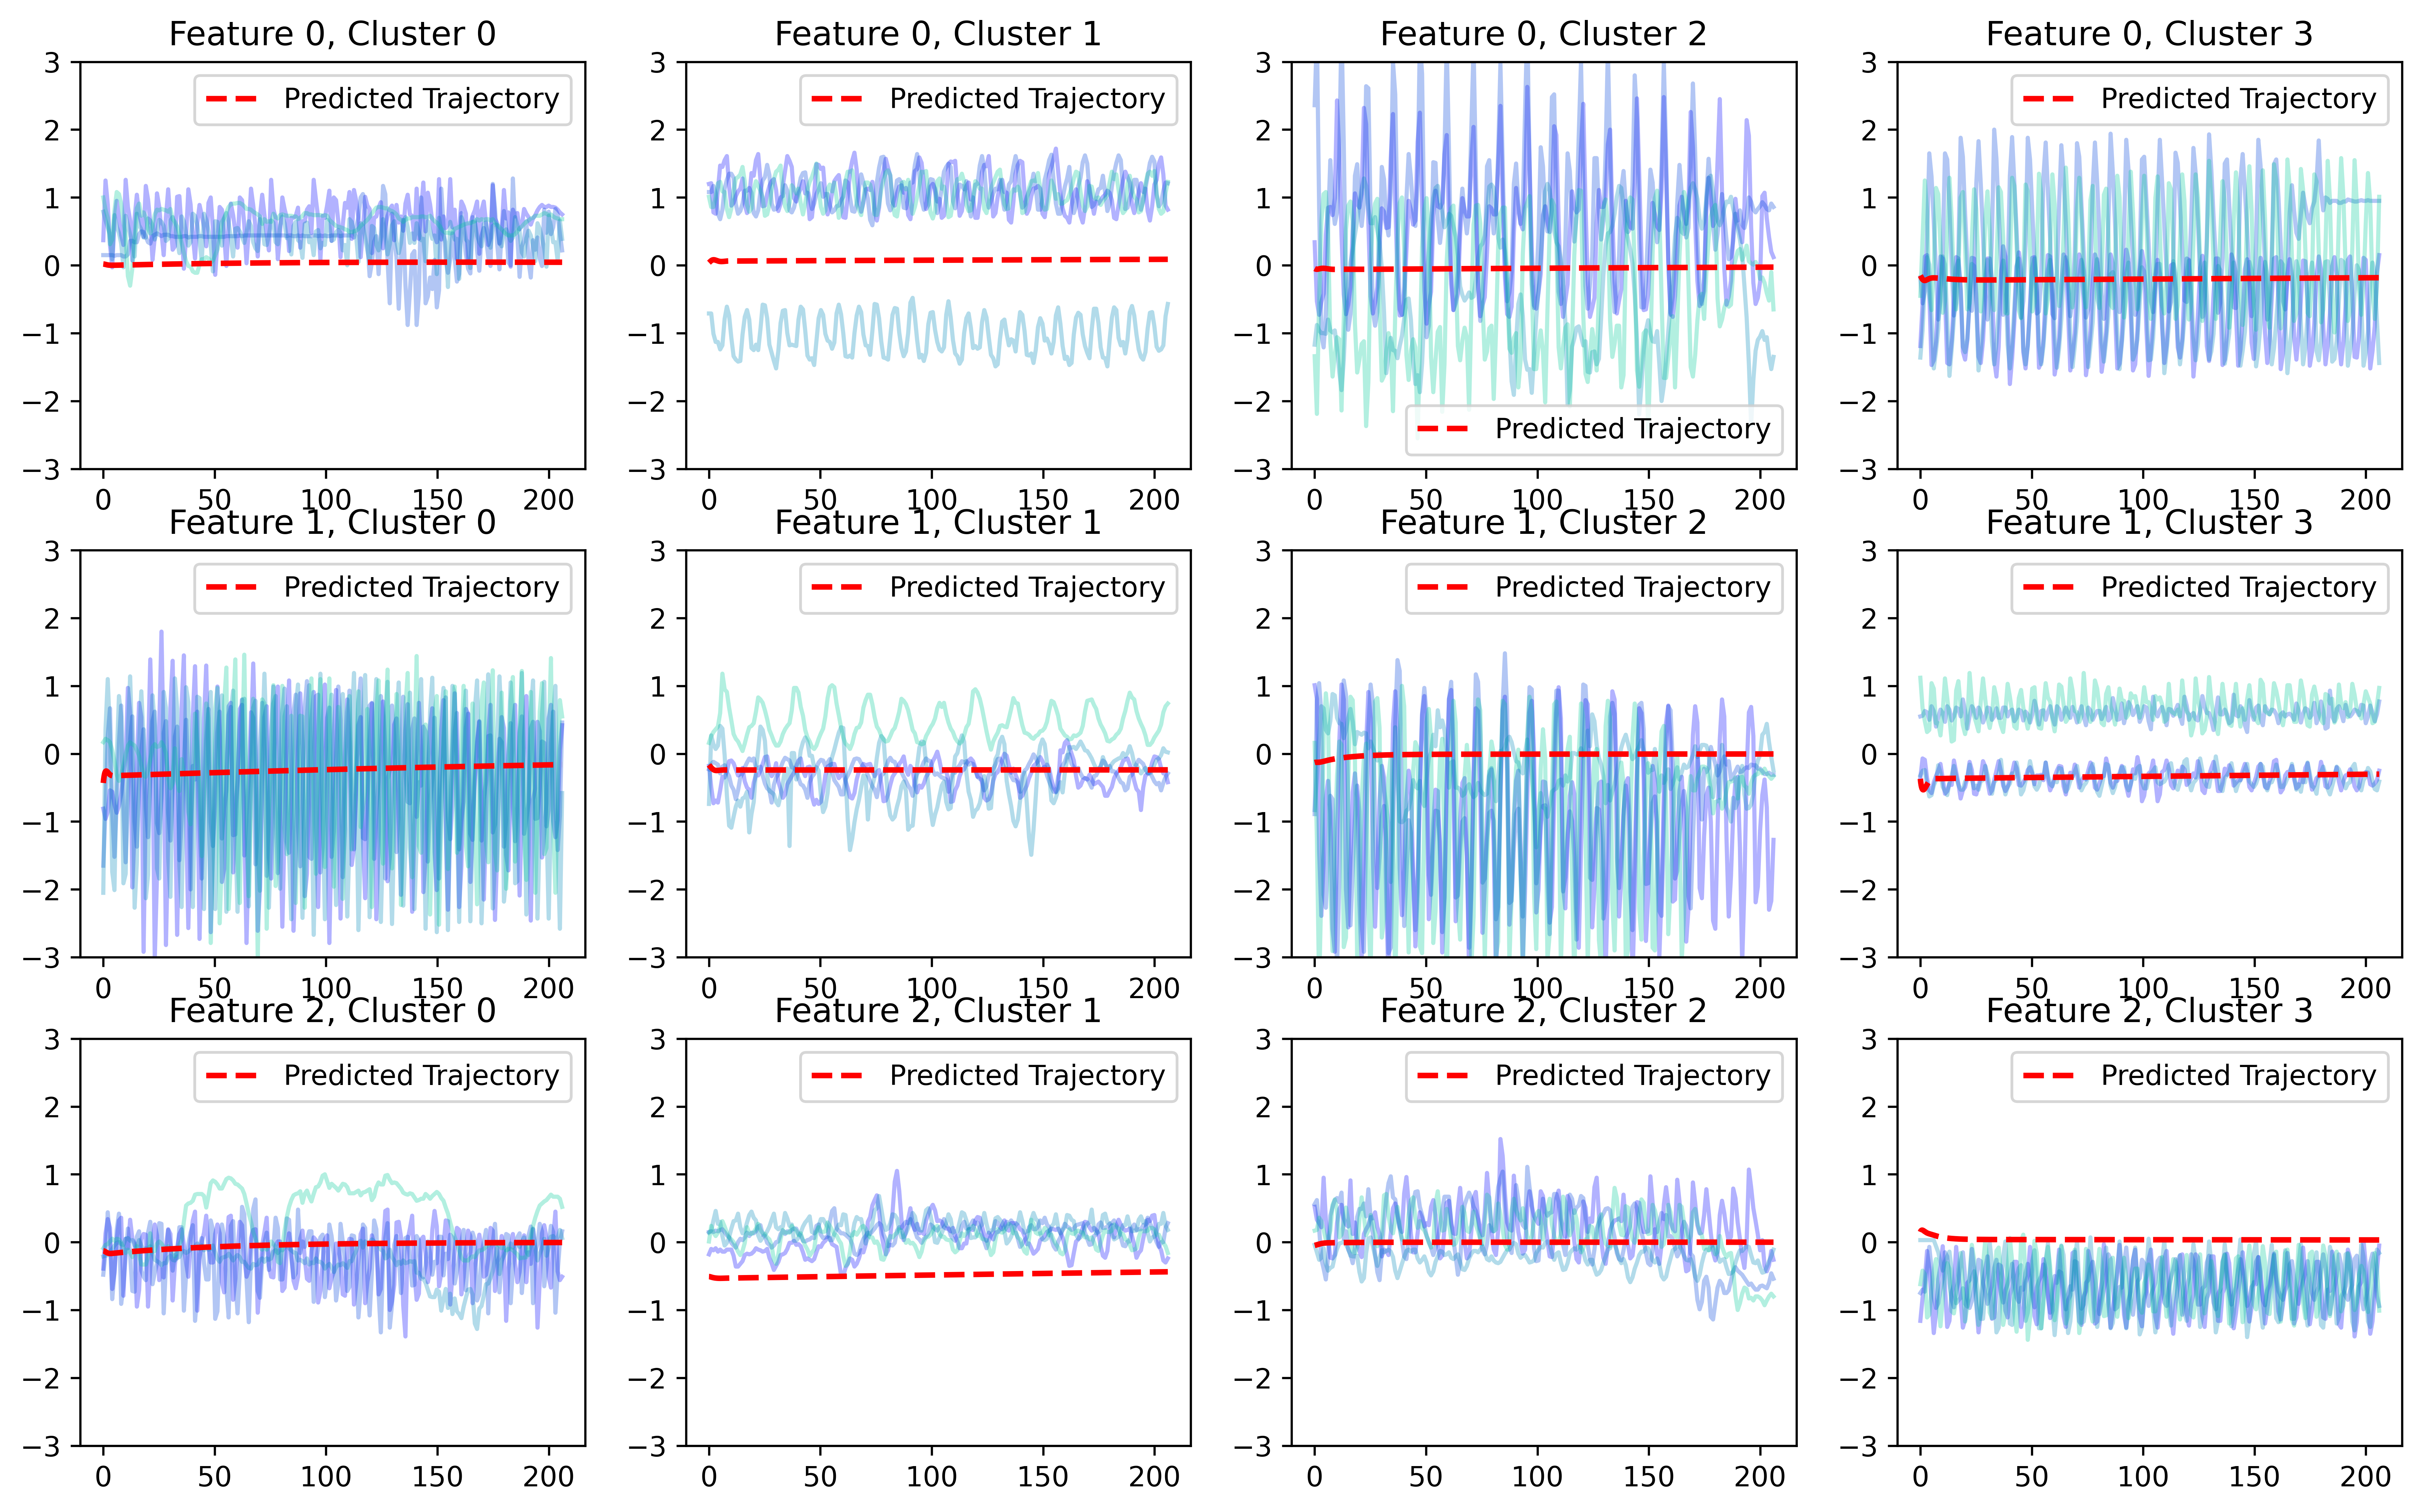

In [4]:
result=vista.loaddic('../results/wearable/wearable_kmeans_'+str(4)+'_cluster_'+str(14)+'_latent_'+str(2)+'.pickle')
nc=4
vista.summarystats(pd.factorize(y)[0], result['label'].reshape(-1),nc)
result_permuted=vista.best_perm(pd.factorize(y)[0],result['label'].reshape(-1),nc,result['parameter'])
vista.predicted_trajectories(result_permuted['parameter'],np.transpose(X.reshape(275,3,206,1),(0,2,1,3)),result_permuted['label'],2060,
                              num_sam=4,legend=False,plotcolor=(plt.cm.winter,0,0.8,0.3),xplot=[0,206],ylim=[-3,3])